# GRIP @ The Spark Foundation Internship 

### Data Science and Business Analytics Intern

## Name : Pratiksha Sanas

### Task-1 : Prediction Using Supervised Machine Learning 
In this task, I will be examining the relationship between the number of study hours and the Percentage of student of students . The goal is to build a linear regression model that can accurately predict the percentage of student based on the number of hours they study

In [1]:
import pandas as pd
import numpy as np 

## Data visualization ##

import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
## model Bulding ###
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#  Data Import

In [2]:
# Reading data from remote link
link="http://bit.ly/w-data"
data=pd.read_csv(link)
print("data imported")

data.head(10)

data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Identify & Treatment of Outlier

<AxesSubplot:>

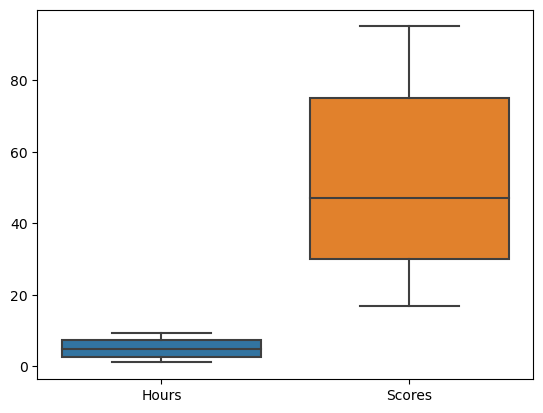

In [5]:
sns.boxplot(data=data)

* No outlier are present 

# Correlation

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

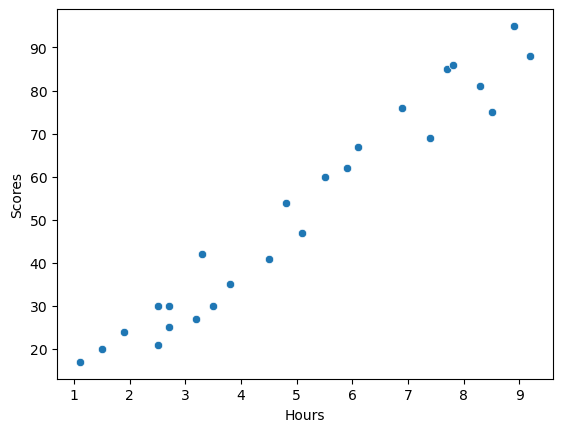

In [6]:
sns.scatterplot(x='Hours',y='Scores',  data= data)

* Positive Correlation between Hours and Scores

In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
# 97% positive strong reletion

# Data Partition

In [9]:
x=data["Hours"]
y=data["Scores"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [12]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,Hours,Scores
6,9.2,88
12,4.5,41
4,3.5,30
24,7.8,86
0,2.5,21


In [22]:
train['fitted_value']=model.fittedvalues # prediction  or fitted value
train['residual']=model.resid  # error or residual

train.head()

,Hours,Scores,fitted_value,residual
6,9.2,88,92.314915,-4.314915
12,4.5,41,45.917857,-4.917857
4,3.5,30,36.046143,-6.046143
24,7.8,86,78.494515,7.505485
0,2.5,21,26.174428,-5.174428


# Linear Regression Model  Buliding 

## Hypotheis Testing
### H0 : - There is no relationship between the Hours & Score
 ###             Vs
### H1 : -There is relationship between the Hours & Score
### Alpha =5% ( 0.05 )

In [13]:
import statsmodels.formula.api as smf
model = smf.ols('Scores ~ Hours', data=train).fit()
model.summary()

C:\Users\Pratiksha\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.15e-11
Time:                        12:01:51   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

* We Reject Ho
* There is relationship between the hourse & score
* Accuracy of Model is 95%, So Model is Good Fit
* Y = 1.4951 + 9.8717 * Hours

# Prediction on Test Data 

In [16]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Hours,Scores
9,2.7,25
22,3.8,35
13,3.3,42
11,5.9,62
5,1.5,20


In [19]:
test['Predicted']=model.predict(test)
test

,Hours,Scores,Predicted
9,2.7,25,28.148771
22,3.8,35,39.007657
13,3.3,42,34.071800
11,5.9,62,59.738257
5,1.5,20,16.302714
19,7.4,69,74.545829
23,6.9,76,69.609972
21,4.8,54,48.879371


# train

In [23]:
from sklearn.metrics import  r2_score
r2 =r2_score(train.Scores, train.fitted_value)
print('r2 score for perfect model is', np.round(r2,2))

r2 score for perfect model is 0.96


#  test

In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(test.Scores, test.Predicted)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.93
